<h1 ><big><center> TP Introduction to Probabilistic Graphical Models</center></big></h1>

### Maestrati Louis
### email: maestratilouis@gmail.com

In [2]:
# importations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Linear Classification

### 1- Generative Model (LDA)

#### 1)

For avoiding confusions with the value $\pi$ and the parameter, we will prefere the notation $\alpha$ than $\pi$.

The Likelihood with respect to the parameters $\alpha, \Sigma, \{\mu_i\}_{i \in \{1,2\} }$ is obtained as: 

$
\begin{align}
L &= \log(p(x,y | \pi, \Sigma, \{\mu_i\} ) ) \\
  &= \log( \Pi_{i \in [1,n]} \alpha^{y_i}*(1-\alpha)^{1-y_i}*N(x_i| \mu_0, \Sigma)^{1-y_i}*N(x_i| \mu_1, \Sigma)^{y_i} ) \\
  &= \sum_{i \in [1,n]} y_i*\log(\alpha) + \log(1-\alpha)*(1-y_i) \\
  &+ (1-y_i)*(-\log(2\pi) - \frac{1}{2}\log(|det(\Sigma)|)- \frac{1}{2}(x_i-\mu_0)^{T}\Sigma^{-1}(x_i-\mu_0) \\
  &+ y_i*(-\log(2\pi) - \frac{1}{2}\log(|det(\Sigma)|)- \frac{1}{2}(x_i-\mu_1)^{T}\Sigma^{-1}(x_i-\mu_1)) 
\end{align}$

Setting the gradient to 0 wrt to $\pi$ ,$\{\mu_i\}$ and $\Sigma$ gives: 

For $\alpha$:

$ \begin{equation}
\frac{\delta L}{\delta \alpha}=0 \iff \sum_{i=1}^{n} \frac{y_i}{alpha}+\frac{1-y_i}{1-\alpha}=0 \iff \frac{\sum_i y_i}{\alpha*(1-\alpha)}=\frac{n \alpha}{\alpha*(1-\alpha)}
\end{equation}$

$ \begin{equation}
\frac{\delta L}{\delta \alpha}=0 \iff \hat{\alpha}= \frac{\sum_i y_i}{n}= \frac{n_1}{n} \text{where $n_1$ is the number of $x_i$ in class 1}
\end{equation}$

As expected, $\alpha$ corresponds to the empirical probability seen in the data to belong to class 1 .

For $\mu_i$:

$ \begin{equation}
\frac{\delta L}{\delta \mu_0}=0 \iff - \Sigma^{-1} \sum_{i=1}^{n} (1-y_i)(x_i-\mu_0)=0
\end{equation}$

$ \begin{equation}
\frac{\delta L}{\delta \mu_0}=0 \iff \hat{\mu_0}= \frac{\sum_{i=1}^{n} (1-y_i)x_i}{\sum_{i=1}^{n} (1-y_i)}=\frac{\sum_{i |y_i=0} x_i}{n_0} \text{, where $n_0$ is the number of elements $x_i$ in class 0}
\end{equation}$

$ \begin{equation}
\frac{\delta L}{\delta \mu_1}=0 \iff \hat{\mu_1}= \frac{\sum_{i=1}^{n} (y_i)x_i}{\sum_{i=1}^{n} (y_i)}=\frac{\sum_{i |y_i=1} x_i}{n_1} \text{, where $n_1$ is the number of elements $x_i$ in class 1}
\end{equation}$


As in the last case, the obtained expectation are the ones empirically observed in the data.

And for $\Sigma$ :

$ \begin{equation}
\frac{\delta L}{\delta \Sigma}=0 \iff \sum_{i=1}^{n} (1-y_i)( -\frac{1}{2} (\Sigma^{T})^{-1} + \frac{1}{2} \Sigma^{-1} (x_i- \mu_0)(x_i-\mu_0)^{T} \Sigma^{-1} ) + (y_i)( -\frac{1}{2} (\Sigma^{T})^{-1} + \frac{1}{2} \Sigma^{-1} (x_i- \mu_1)(x_i-\mu_1)^{T} \Sigma^{-1} )
\end{equation}
$

$ \begin{equation}
\frac{\delta L}{\delta \Sigma}=0 \iff \frac{n}{2} \Sigma^{-1}=\frac{1}{2} \Sigma^{-1} \sum_{i=1}^{n} (1-y_i)(x_i- \mu_0)(x_i-\mu_0)^{T} +y_i (x_i- \mu_1 )(x_i-\mu_1 )^{T} \Sigma^{-1} 
\end{equation}
$


$ \begin{equation}
\frac{\delta L}{\delta \Sigma}=0 \iff  \hat{\Sigma}=\frac{1}{n}  \sum_{i}^{n} (1-y_i)(x_i- \mu_0)(x_i-\mu_0)^{T} +y_i (x_i- \mu_1 )(x_i-\mu_1 )^{T} 
\end{equation}
$

Interestingly, $\hat{\Sigma}$ can be rewritten as $\hat{\Sigma} = \hat{\alpha} \hat{\Sigma_1} + (1-\hat{\alpha}) \hat{\Sigma_0}$ , where:

$ \begin{equation}
\hat{\Sigma_1}=\frac{1}{n_1}  \sum_{i|y_i=0} (x_i- \mu_0)(x_i-\mu_0)^{T} 
\end{equation}
$

$ \begin{equation}
\hat{\Sigma_0}=\frac{1}{n_0}  \sum_{i|y_i=1} (x_i- \mu_0)(x_i-\mu_0)^{T}
\end{equation}
$

$\hat{\Sigma}$ is a pondered by sommation of the empirical variances $\hat{\Sigma_1}$ and $\hat{\Sigma_0}$ observed in the data.

#### 2)

Using the Bayes rule we obtain:

$\begin{align}
p(y=1|x) &= \frac{p(x|y=1)p(y=1)}{p(x)} \\
         &= \frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1)+ p(x|y=0)p(y=0)}
\end{align}$

$\begin{equation}
p(y=1|x) =  \frac{ \hat{\alpha}\space \times \space exp(-\frac{1}{2}(x-\hat{\mu_1})^T\hat{\Sigma}^{-1}(x-\hat{\mu_1})) }{exp(-\frac{1}{2}(x-\hat{\mu_1})^T\hat{\Sigma}^{-1}(x-\hat{\mu_1}))\space \times \space \hat{\alpha} \space+ \space exp(-\frac{1}{2}(x-\hat{\mu_0})^T\hat{\Sigma}^{-1}(x-\hat{\mu_0}))\space \times \space(1-\hat{\alpha})}
\end{equation}$

$\begin{equation}
p(y=1|x) =  \frac{1}{1+ \frac{1-\alpha}{\alpha}exp(-\frac{1}{2}(x-\hat{\mu_0})^T\hat{\Sigma}^{-1}(x-\hat{\mu_0})+\frac{1}{2}(x-\hat{\mu_1})^T\hat{\Sigma}^{-1}(x-\hat{\mu_1}))}
\end{equation}$

$\begin{equation}
p(y=1|x) =  \frac{1}{1+ \frac{1-\alpha}{\alpha}exp(-\frac{1}{2}(x-\hat{\mu_0})^T\hat{\Sigma}^{-1}(x-\hat{\mu_0})+\frac{1}{2}(x-\hat{\mu_1})^T\hat{\Sigma}^{-1}(x-\hat{\mu_1}))}
\end{equation}$

$\begin{equation}
p(y=1|x) =  \frac{1}{1+ exp(-(w^{T}x+b))}=\sigma(w^{T}x+b) \text{ where $ w=\Sigma^{-1}(\hat{\mu_1}-\hat{\mu_0}) $ and $b= -\ln(\frac{1-\alpha}{\alpha})-\frac{1}{2}(\hat{\mu_1}-\hat{\mu_0})^{T}\Sigma^{-1}(\hat{\mu_1}+\hat{\mu_0})$}
\end{equation}$

This form is very similar to the one of the logistic regression, our decision. Thanks to the fact we assume both classes $\Sigma$ we get an explicit form for $w$ and thus an explicit form of the decision boundary $p(y=1|x)=0.5 \iff w^{T}x+b=0$.

### 3)

In [69]:
def LDA(data):
    '''Applying LDA to the data and returning the estimated parameters alpha, mu_i, Sigma '''
    y=data[:,2]
    x=data[:,0:2]
    n=data.shape[0]
    
    n1=np.sum(y)
    alpha=n1/n
    mu0=np.sum(x[y==0],0)/(n-n1)
    mu1=np.sum(x[y==1],0)/n1
    #print(mu0.shape)
    Sigma0=np.zeros((2,2))
    Sigma1=np.zeros((2,2))
    for e in x[y==0]:
        Sigma0+=((e-mu0).reshape(2,1))@(((e-mu0).reshape(2,1)).T)
        #print((e-mu0)@((e-mu0).T))
        #print((e-mu0).shape)
    Sigma0=Sigma0/(n-n1)
    #print(Sigma0)
    #Sigma0=(x[y==0]-mu0)@((x[y==0]-mu0).T)/(n-n1)
    #print(Sigma0.shape)
    for e in x[y==1]:
        Sigma1+=((e-mu1).reshape(2,1))@(((e-mu1).reshape(2,1)).T)
    Sigma1=Sigma1/(n1)
    #print(Sigma1)
    #Sigma1=(x[y==1]-mu1)@((x[y==1]-mu1).T)/(n1)
    
    Sigma=alpha*Sigma1+(1-alpha)*Sigma0
    
    return alpha, mu0, mu1, Sigma
    

To plot our decision boundaries we can use one point and the direction of the boundary decision:
Starting from:
\begin{equation}
   w^{T}x+b=0= w_1 x_1 +w_2 x_2=-b 
\end{equation}

We have:

$\begin{align}
w_1 \times 0 + w_2 x_2 &= -b \iff x= \begin{bmatrix} 0 \\-\frac{b}{w_2} \end{bmatrix} \\
w_2 \times \Delta_{x_2} + w_1 \Delta_{x_1} &= 0 \iff \frac{\Delta_{x_2}}{\Delta_{x_1}}=-\frac{w_1}{w_2}
\end{align}$
        
Of course, if  $w_2=0$, we would use other points but this didn't appear in our datas.

#### Aplying to the datas

Data A
Obtained alpha:
0.47474747474747475
Obtained mu0:
[10.73248858 10.93983367]
Obtained mu1:
[11.00911982  5.98309461]
Obtained Sigma:
[[0.58154891 0.13525529]
 [0.13525529 0.82566886]]
   
Data B
Obtained alpha:
0.5477386934673367
Obtained mu0:
[10.58256756 11.17169818]
Obtained mu1:
[11.2357268   6.08554784]
Obtained Sigma:
[[1.64371135 0.6979725 ]
 [0.6979725  2.06522898]]
   
Data C
Obtained alpha:
0.4180602006688963
Obtained mu0:
[10.61324808 10.83448839]
Obtained mu1:
[11.18463199  6.04249315]
Obtained Sigma:
[[ 1.27886433 -0.06520325]
 [-0.06520325  1.66961839]]
   


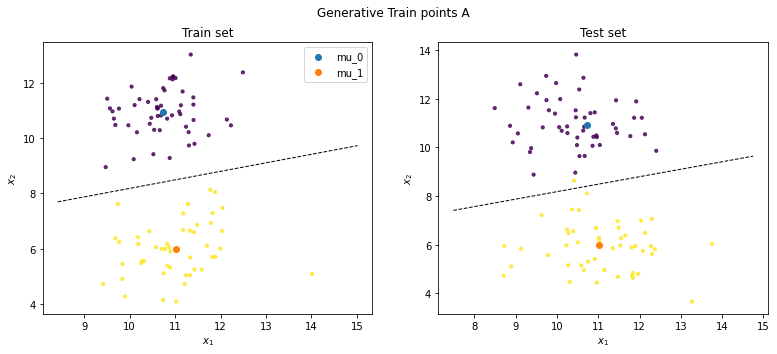

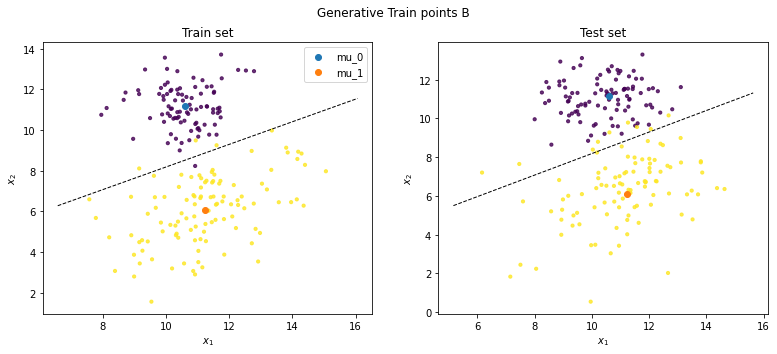

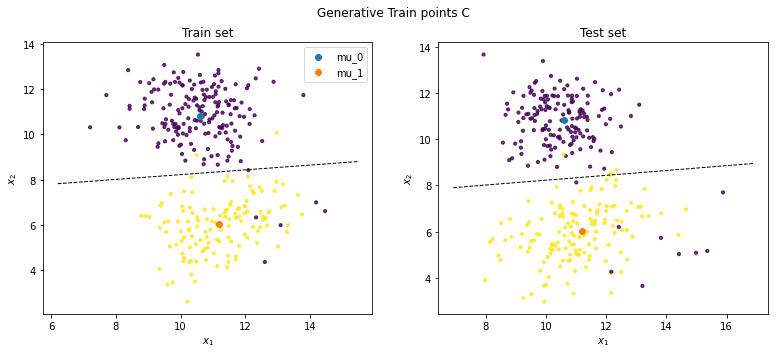

In [86]:
list_data=['A','B','C']
for char in list_data:
    data = pd.read_csv("data/train"+char, sep=' ')
    data = np.array(data)
    test = pd.read_csv("data/test"+char, sep=' ')
    test = np.array(test)
    
    alpha, mu0, mu1, Sigma=LDA(data)
    w=np.linalg.inv(Sigma)@(mu1-mu0)
    b=np.log(alpha/(1-alpha))-0.5*(mu1-mu0).T@(np.linalg.inv(Sigma))@(mu1+mu0)
    
    #tool for decision boundary
    m=-w[0]/w[1]
    c=-b/w[1]
    
    #plotting and showing results:
    print('Data '+char)
    print('Obtained alpha:')
    print(alpha)
    print('Obtained mu0:')
    print(mu0)
    print('Obtained mu1:')
    print(mu1)
    print('Obtained Sigma:')
    print(Sigma)
    print ("   ")
    fig, axs = plt.subplots(1, 2, figsize=(13, 5))
    fig.suptitle('Generative Train points '+char)
    
    
    xmin, xmax =np.min(data[:, 0])-1, np.max(data[:, 0])+1
    ymin, ymax = np.min(data[:, 1])-1, np.max(data[:, 1])+1
    xd = np.array([xmin, xmax])
    yd = m*xd + c
    #Train
    axs[0].plot(xd, yd, 'k', lw=1, ls='--')
    axs[0].scatter(data[:, 0], data[:, 1], c=data[:, 2], s=10 , alpha=0.8)
    axs[0].scatter(mu0[0], mu0[1], label="mu_0")
    axs[0].scatter(mu1[0], mu1[1], label="mu_1")
    axs[0].legend()
    axs[0].set_ylabel(r'$x_2$')
    axs[0].set_xlabel(r'$x_1$')
    axs[0].set_title('Train set')
    #Test
    xmin, xmax =np.min(test[:, 0])-1, np.max(test[:, 0])+1
    ymin, ymax = np.min(test[:, 1])-1, np.max(test[:, 1])+1
    xd = np.array([xmin, xmax])
    yd = m*xd + c
    axs[1].plot(xd, yd, 'k', lw=1, ls='--')
    axs[1].scatter(test[:, 0], test[:, 1], c=test[:, 2], s=10 , alpha=0.8)
    axs[1].scatter(mu0[0], mu0[1], label="mu_0")
    axs[1].scatter(mu1[0], mu1[1], label="mu_1")
    axs[1].set_ylabel(r'$x_2$')
    axs[1].set_xlabel(r'$x_1$')
    axs[1].set_title('Test set')
    
    